In [ ]:
import pandas as pd

df = pd.read_csv("health_ml_dataset.csv")

print(df.shape)
df.head()


(374280, 9)


,smoking_status,copd,depression,sleep_hours,bmi,physical_activity,age,gender,copd_and_depression
0,0.0,0.0,0.0,6.0,26.57,0.0,80.0,F,0
1,0.0,0.0,0.0,5.0,25.61,1.0,56.0,F,0
2,1.0,0.0,0.0,7.0,23.30,1.0,73.0,F,0
3,0.0,0.0,0.0,9.0,21.77,1.0,43.0,F,0
4,0.0,0.0,0.0,7.0,26.08,0.0,80.0,M,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[[
    "smoking_status",
    "sleep_hours",
    "bmi",
    "physical_activity",
    "age",
    "gender"
]]

X["gender"] = X["gender"].map({"M": 0, "F": 1})
y = df["copd_and_depression"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))


/tmp/ipython-input-549982422.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].map({"M": 0, "F": 1})


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    108819
           1       0.25      0.00      0.00      3465

    accuracy                           0.97    112284
   macro avg       0.61      0.50      0.49    112284
weighted avg       0.95      0.97      0.95    112284



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    108819
           1       0.29      0.00      0.00      3465

    accuracy                           0.97    112284
   macro avg       0.63      0.50      0.49    112284
weighted avg       0.95      0.97      0.95    112284



In [ ]:
X = X.copy()
X["gender"] = (
    X["gender"]
    .map({"M": 0, "F": 1})
    .astype("Int64")   # DİKKAT: büyük I
)


In [ ]:
X.head()
X.dtypes


,0
smoking_status,float64
sleep_hours,float64
bmi,float64
physical_activity,float64
age,float64
gender,Int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[
    [
        "smoking_status",
        "sleep_hours",
        "bmi",
        "physical_activity",
        "age",
        "gender"
    ]
].copy()

X["gender"] = X["gender"].map({"M": 0, "F": 1}).astype("Int64")
y = df["copd_and_depression"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model_bal = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)

model_bal.fit(X_train_scaled, y_train)
y_pred = model_bal.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.69      0.81    108819
           1       0.07      0.75      0.13      3465

    accuracy                           0.69    112284
   macro avg       0.53      0.72      0.47    112284
weighted avg       0.96      0.69      0.79    112284



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest modeli
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# Eğit
rf_model.fit(X_train, y_train)

# Tahmin
y_pred_rf = rf_model.predict(X_test)

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_rf))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_rf))


CONFUSION MATRIX
[[87395 21424]
 [ 1324  2141]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    108819
           1       0.09      0.62      0.16      3465

    accuracy                           0.80    112284
   macro avg       0.54      0.71      0.52    112284
weighted avg       0.96      0.80      0.86    112284



             Feature  Importance
0     smoking_status    0.277192
2                bmi    0.237606
4                age    0.185366
1        sleep_hours    0.146213
3  physical_activity    0.102045
5             gender    0.051579


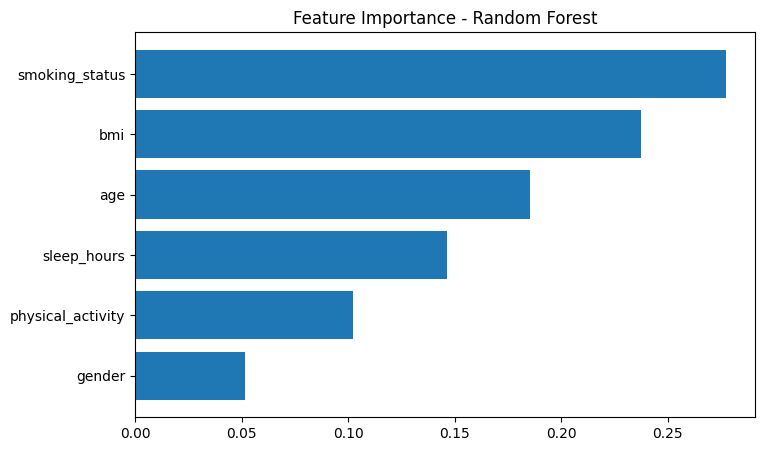

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

features = X.columns
importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(fi_df)

# Grafik
plt.figure(figsize=(8,5))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()


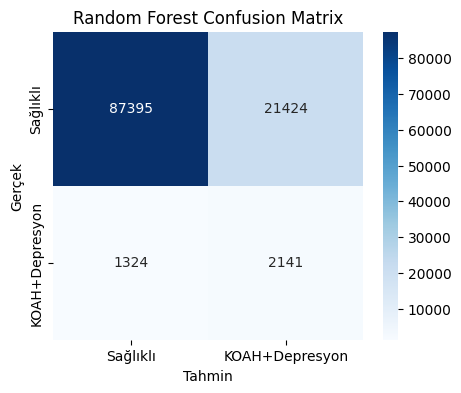

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Sağlıklı", "KOAH+Depresyon"],
    yticklabels=["Sağlıklı", "KOAH+Depresyon"]
)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Random Forest Confusion Matrix")
plt.savefig("confusion_matrix.png", bbox_inches="tight")
plt.show()


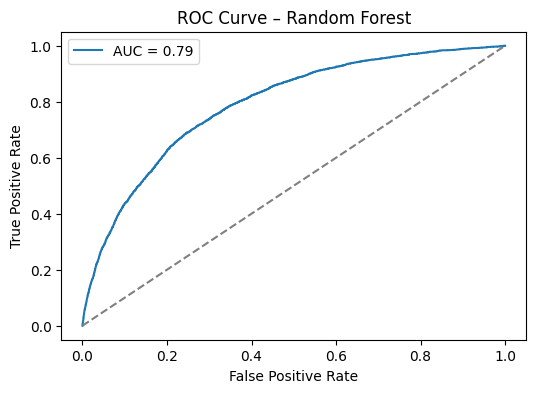

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


/tmp/ipython-input-456496821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


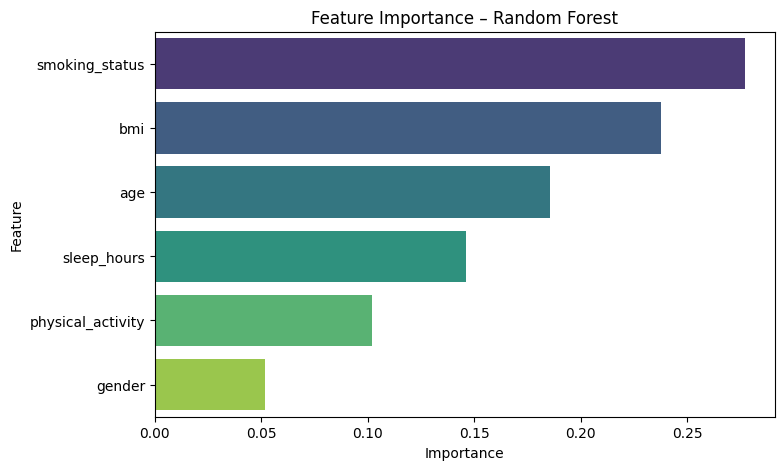

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=fi_df,
    palette="viridis"
)
plt.title("Feature Importance – Random Forest")
plt.savefig("feature_importance.png", bbox_inches="tight")

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

# Model listesini oluşturma
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC()
}

# Modelleri döngü ile eğitme ve sonuçları toplama
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "Recall": rec})

# Sonuçları DataFrame olarak bastırma
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import xgboost as xgb


In [ ]:
df = pd.read_csv("health_ml_dataset.csv")
df.head()


,smoking_status,copd,depression,sleep_hours,bmi,physical_activity,age,gender,copd_and_depression
0,0.0,0.0,0.0,6.0,26.57,0.0,80.0,F,0
1,0.0,0.0,0.0,5.0,25.61,1.0,56.0,F,0
2,1.0,0.0,0.0,7.0,23.30,1.0,73.0,F,0
3,0.0,0.0,0.0,9.0,21.77,1.0,43.0,F,0
4,0.0,0.0,0.0,7.0,26.08,0.0,80.0,M,0


In [ ]:
X = df.drop("copd_and_depression", axis=1)
y = df["copd_and_depression"]


In [ ]:
X = X.copy()
X.loc[:, "gender"] = X["gender"].map({"M": 0, "F": 1})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [ ]:
scale_pos = (y_train == 0).sum() / (y_train == 1).sum()

model_xgb = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [ ]:
X = X.copy()
X["gender"] = X["gender"].map({"M": 0, "F": 1})


In [ ]:
X.dtypes


,0
smoking_status,float64
copd,float64
depression,float64
sleep_hours,float64
bmi,float64
physical_activity,float64
age,float64
gender,float64


In [ ]:
X.dtypes[X.dtypes == "object"]


,0


In [ ]:
# Gender'ı sayısala çevir
X = X.copy()
X["gender"] = X["gender"].map({"M": 0, "F": 1})

# HÂLÂ object kalan varsa tamamen düşür
X = X.select_dtypes(include=["int64", "float64", "bool"])


In [ ]:
X = X.select_dtypes(include=["int64", "float64", "bool"])


In [ ]:
X.dtypes


,0
smoking_status,float64
copd,float64
depression,float64
sleep_hours,float64
bmi,float64
physical_activity,float64
age,float64
gender,float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [ ]:
scale_pos = (y_train == 0).sum() / (y_train == 1).sum()

model_xgb = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nCLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_xgb))


CONFUSION MATRIX
[[108819      0]
 [     0   3465]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108819
           1       1.00      1.00      1.00      3465

    accuracy                           1.00    112284
   macro avg       1.00      1.00      1.00    112284
weighted avg       1.00      1.00      1.00    112284



In [ ]:
X = df[
    [
        "smoking_status",
        "sleep_hours",
        "bmi",
        "physical_activity",
        "age"
    ]
]

y = df["copd_and_depression"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scale_pos = (y_train == 0).sum() / (y_train == 1).sum()

model_xgb = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[80050 28769]
 [  965  2500]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84    108819
           1       0.08      0.72      0.14      3465

    accuracy                           0.74    112284
   macro avg       0.53      0.73      0.49    112284
weighted avg       0.96      0.74      0.82    112284



<Figure size 1000x600 with 0 Axes>

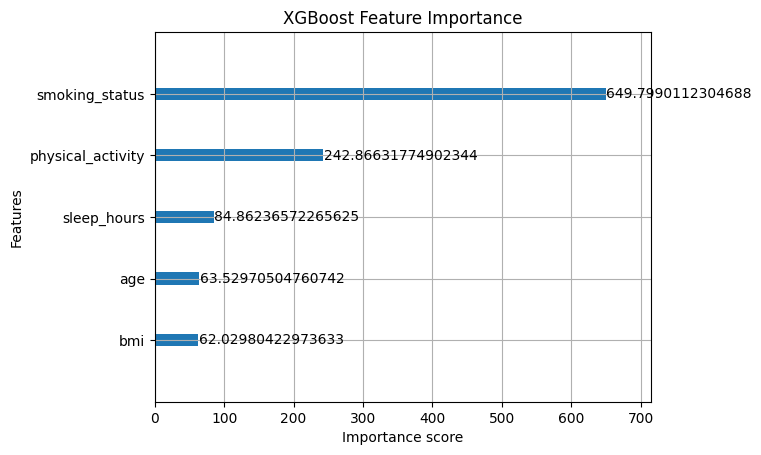

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(10,6))
xgb.plot_importance(
    model_xgb,
    max_num_features=8,
    importance_type="gain"
)
plt.title("XGBoost Feature Importance")
plt.show()


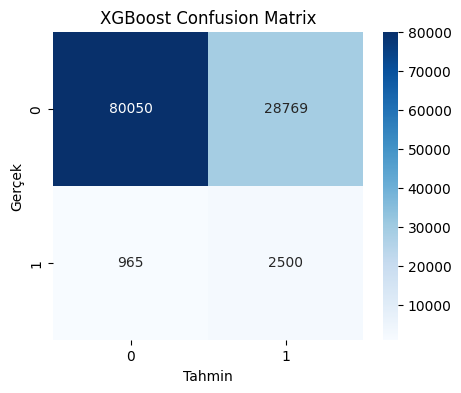

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("XGBoost Confusion Matrix")
plt.show()


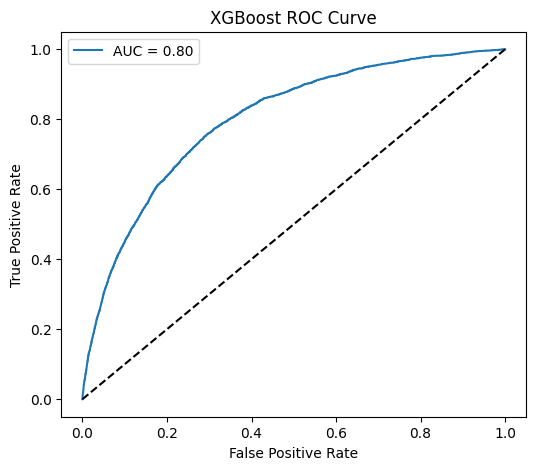

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model_xgb.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

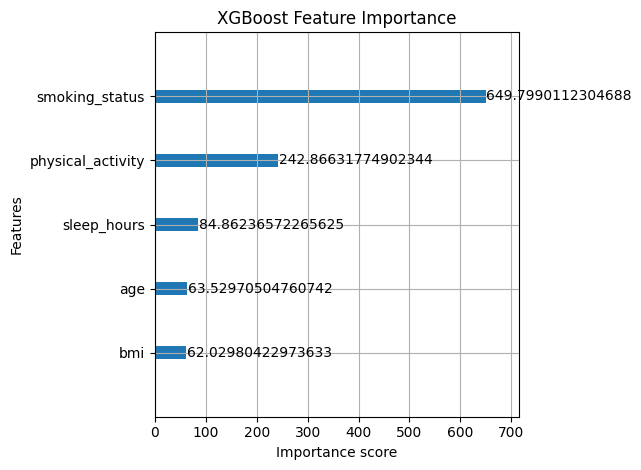

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(10,6))
xgb.plot_importance(
    model_xgb,
    max_num_features=8,
    importance_type="gain"
)
plt.title("XGBoost Feature Importance")
plt.tight_layout()

plt.savefig("feature_importancee.png")
plt.show()


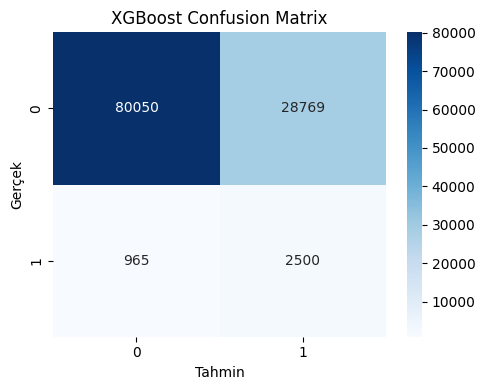

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("XGBoost Confusion Matrix")
plt.tight_layout()

plt.savefig("confusion_matrixx.png")
plt.show()


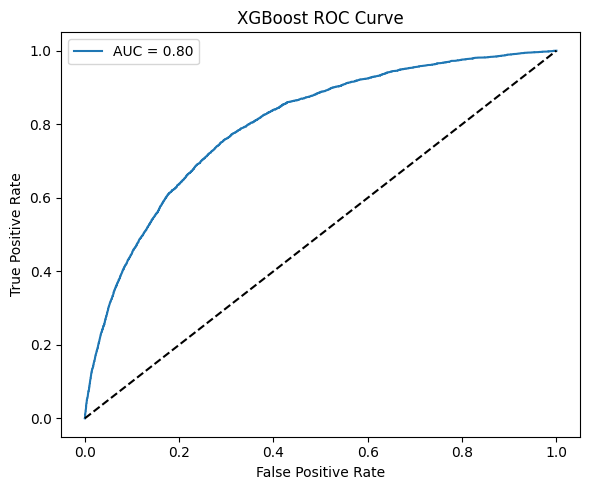

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.tight_layout()

plt.savefig("roc_curve.png")
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

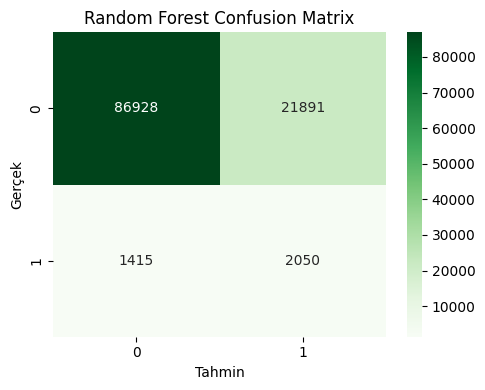

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest tahmin
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens"
)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()

plt.savefig("rf_confusion_matrix.png")
plt.show()


In [31]:
df = pd.read_csv("health_ml_dataset.csv")

df_pos = df[df["copd_and_depression"] == 1].sample(5000, random_state=42)
df_neg = df[df["copd_and_depression"] == 0].sample(5000, random_state=42)

df_10k = pd.concat([df_pos, df_neg]).sample(frac=1, random_state=42)

df_10k.to_csv("health_ml_dataset_10k_balanced.csv", index=False)

print(df_10k["copd_and_depression"].value_counts())


copd_and_depression
0    5000
1    5000
Name: count, dtype: int64
